#  Description

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Data Loading & Preprocessing

- Creating Dataframe using pandas and checking if dataframe contains any Null values.

In [3]:
# Read the data from the file
# Load the data into a useful format
# Preprocess the features 

raw_df = pd.read_csv("BostonHousing.csv")
raw_df.isnull().sum()
raw_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
raw_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
raw_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Exploring Features


- I'm using corr() function to find correlation coefficient matrix to find the most relevant features (features     selection)
- Then using a loop excluded features who's correlation coefficient is more then 0.9, that means features how's     correlation coeff.  is more than 0.9 have have a linear relation so we no need to take it in consideration.

In [6]:
corr_matrix = raw_df.corr()

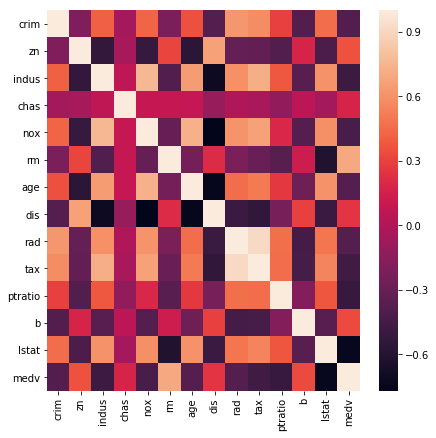

In [7]:
plt.figure(figsize = (7,7))
sns.heatmap(corr_matrix)
plt.show()

In [8]:
# Eliminating columns who's correlation coefficient is more then 0.9

columns = np.full((corr_matrix.shape[0],), True, dtype = bool)
for i in range(corr_matrix.shape[0]):
    for j in range(i+1,corr_matrix.shape[0]):
        if corr_matrix.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [9]:
selected_cols = []
for i in range(len(columns)):
    if columns[i]:
        selected_cols.extend([raw_df.columns[i]])       

# Data Partitioning

- creating spliting data for X Y from raw dataframe, for X I have selected only those features(column) which we     getting after correlation matching and also droped 'rm' column as its our target column.
- Y dataframe is column 'rm' which is no. of average rooms.
- Later I have split X and Y for training and testing. Here I have used train_test_split() function so sklearn in   which I have taken test_size as 0.2 i.e 20 %, that means 80 % X will be used for training and 20 % for X will be   used for testing. Simillarly for Y as well.
- Pros of train_test_split
  -its good for large data state.
- Cons of train_test_split
  -this create a kind of baised model because we can vary random_state to get high accuracy, for small data set we 
  can use cross validation method.

In [10]:
X = raw_df[selected_cols].drop('rm', axis = 1)
y = raw_df['rm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 17)

# Training Process

- Since our input data and target data contain continous values so in such condition we need go with regression     algorithm
- Pros
  Simple easy to build
- Cons
  Data should be normally distributed
  Prone to outliners

In [16]:
LL = GradientBoostingRegressor(n_estimators=200,learning_rate=0.05)

In [17]:
model = LL.fit(X_train,y_train)

# Evaluation Process

- I have calcuated RMSE value to check possible range of error that can be found in our prediction
- I have also calculated R2 Score which indicates that to what extend variance of one variable explains the         variance of the second variable. So, if the R2 of a model is 0.50, then approximately half of the observed         variation can be explained by the model's inputs.
- Our R2 is 74 % which is kind of good but not satisfactory
- I have also plot normal distribution of residual i.e (actual value) - (predicted value by model)

In [18]:
# Score on testing data
print(round(model.score(X_test,y_test)*100))

74.0


In [20]:
# Score on training data
print(round(model.score(X_train,y_train)*100,1))

93.4


In [21]:
y_expt = y_test
y_pred = model.predict(X_test)

In [22]:
rmse = (np.sqrt(mean_squared_error(y_expt, y_pred)))
r2 = r2_score(y_expt, y_pred)
print("RMSE value {} and R2 Score {}".format(round(rmse,5),round(r2,5)))

RMSE value 0.33762 and R2 Score 0.73812


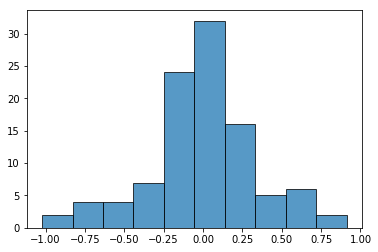

In [23]:
residual = y_expt - y_pred
plt.hist(residual,alpha = 0.75, histtype='bar',ec='black')
plt.show()

# Results and Conclusions

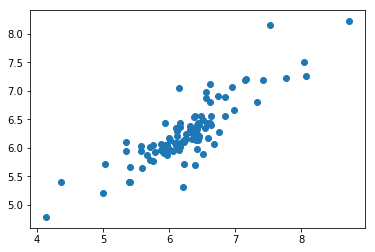

In [24]:
plt.scatter(y_expt, y_pred)